# Laboratorio 7

* Asuma que las operaciones no requieren alta precisión.
* Presente su solución con el nombre `lab7_codigoPUCP.ipynb`

In [150]:
import numpy
ns = 2**numpy.arange(5,15)

print(ns)

[   32    64   128   256   512  1024  2048  4096  8192 16384]


a) Implementar (en un único archivo) cuatro funciones en C que acumule el producto interno de dos arreglos números reales. Solo puede emplear un único bucle `for`. En la primera función realizar la acumulación elemento a elemento, en la segunda acumule en bloques de 2 elementos, en la tercera acumule en bloques de 4 elementos, y en la cuarta acumule en bloques de 8 elementos. (2.0 ptos)

In [151]:
%%file parte_a.c
#include <stdio.h>
#include <stdint.h>

double acumulacion_por_elemento(double* arr1,double* arr2, int size){

    double suma=0.0;
    for (int i=0;i<size;i++){

        suma= suma+ arr1[i]*arr2[i];

    }

    return suma;
}

double acumulacion_por_bloque2(double* arr1,double* arr2, int size){

    double suma=0.0;
    for (int i=0;i<size;i=i+2){

        suma= suma+ arr1[i]*arr2[i] + arr1[i+1]*arr2[i+1];

    }
    return suma;
}

double acumulacion_por_bloque4(double* arr1,double* arr2, int size){

    double suma=0.0;
    for (int i=0;i<size;i=i+4){

        suma= suma+ arr1[i]*arr2[i] + arr1[i+1]*arr2[i+1] + arr1[i+2]*arr2[i+2]  + arr1[i+3]*arr2[i+3];

    }
    return suma;
}

double acumulacion_por_bloque8(double* arr1,double* arr2, int size){

    double suma=0.0;
    for (int i=0;i<size;i=i+8){

        suma= suma+ arr1[i]*arr2[i] + arr1[i+1]*arr2[i+1] + arr1[i+2]*arr2[i+2]  + arr1[i+3]*arr2[i+3] + arr1[i+4]*arr2[i+4] + arr1[i+5]*arr2[i+5] + arr1[i+6]*arr2[i+6]  + arr1[i+7]*arr2[i+7];

    }
    return suma;
}

Overwriting parte_a.c


b) Coloque el comando para generar la librería dinámica del ítem (a) y genere la librería dinámica. (0.25 ptos)

In [152]:
!gcc -c parte_a.c -lm
!gcc -shared parte_a.o -o parte_a.so

c) Implemente una función que vincule la librería dinámica generada en el ítem (b) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las cuatro funciones configuradas listas para su uso. (0.5 ptos)

In [153]:
import ctypes
import numpy as np

def ctypes_producto():
     
    lib = ctypes.CDLL('./parte_a.so')

    lib.acumulacion_por_elemento.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),np.ctypeslib.ndpointer(dtype = np.double), ctypes.c_int]
    lib.acumulacion_por_elemento.restype = ctypes.c_double

    lib.acumulacion_por_bloque2.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),np.ctypeslib.ndpointer(dtype = np.double), ctypes.c_int]
    lib.acumulacion_por_bloque2.restype = ctypes.c_double

    lib.acumulacion_por_bloque4.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),np.ctypeslib.ndpointer(dtype = np.double), ctypes.c_int]
    lib.acumulacion_por_bloque4.restype = ctypes.c_double

    lib.acumulacion_por_bloque8.argtypes=[np.ctypeslib.ndpointer(dtype=np.double),np.ctypeslib.ndpointer(dtype = np.double), ctypes.c_int]
    lib.acumulacion_por_bloque8.restype = ctypes.c_double

    return lib.acumulacion_por_elemento, lib.acumulacion_por_bloque2 , lib.acumulacion_por_bloque4 , lib.acumulacion_por_bloque8


d) Haga una instancia de las cuatro funciones a partir de su función en el ítem (c) (0.25 ptos)

In [154]:
acumulacion_por_elemento,acumulacion_por_bloque2,acumulacion_por_bloque4,acumulacion_por_bloque8 = ctypes_producto()

e) Pruebe todas sus funciones obtenidas en el ítem (d) para el menor de los valores de `ns`  y muestre que dan el mismo resultado. Completar la información para generar dos arreglos.(1.25 ptos)

In [155]:

n = ns[0]
a = numpy.random.rand(n,1)
b = numpy.random.rand(n,1)

valor_1= acumulacion_por_elemento(a,b,n)
valor_2= acumulacion_por_bloque2(a,b,n)
valor_3= acumulacion_por_bloque4(a,b,n)
valor_4= acumulacion_por_bloque8(a,b,n)

print(valor_1)
print(valor_2)
print(valor_3)
print(valor_4)


8.895812460415009
8.895812460415009
8.895812460415009
8.895812460415009


f) Pruebe todas sus funciones obtenidas en el ítem (d) para el mayor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. Completar nuevamente los arreglos a y b (1.25 ptos)

In [156]:
n = ns[-1]
a = numpy.random.rand(n,1)
b = numpy.random.rand(n,1)

valor_1= acumulacion_por_elemento(a,b,n)
valor_2= acumulacion_por_bloque2(a,b,n)
valor_3= acumulacion_por_bloque4(a,b,n)
valor_4= acumulacion_por_bloque8(a,b,n)

print(valor_1)
print(valor_2)
print(valor_3)
print(valor_4)

4082.3060820684227
4082.3060820684227
4082.3060820684227
4082.3060820684227


g) Realice 50 mediciones de tiempo para todas sus funciones, y para todos los valores de `ns`. El valor representativo de las 50 mediciones será la mediana. (0.5 ptos)

In [157]:
import time
import matplotlib.pyplot as plt
import statistics


lista_funcion1_N = []
lista_funcion2_N = []
lista_funcion3_N = []
lista_funcion4_N = []

for size in ns:
        
    iteraciones = 50
    lista_func1 = []
    lista_func2 = []
    lista_func3 = []
    lista_func4 = []    

    n=ns[0]
    a =numpy.random.rand(n,1)
    b= numpy.random.rand(n,1)

    for _ in range(iteraciones):
            
        tic_1 = time.perf_counter()
        acumulacion_por_elemento(a,b,size)
        toc_1 = time.perf_counter()
        acumulacion_por_bloque2(a,b,size)
        tic_2 = time.perf_counter()
        acumulacion_por_bloque4(a,b,size)
        toc_2 = time.perf_counter()
        acumulacion_por_bloque8(a,b,size)
        tic_3 = time.perf_counter()

        #Guardo las 50 iteraciones en los arreglos lista_funcx
        lista_func1.append(toc_1-tic_1)
        lista_func2.append(tic_2-toc_1)
        lista_func3.append(toc_2-tic_2)
        lista_func4.append(tic_3-toc_2)

# Voy guardando la mediana de las 50 tiempos tomadados a cada funcion para cada valor de ns
    lista_funcion1_N.append(statistics.median(lista_func1))
    lista_funcion2_N.append(statistics.median(lista_func2))
    lista_funcion3_N.append(statistics.median(lista_func3))
    lista_funcion4_N.append(statistics.median(lista_func4))




h) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

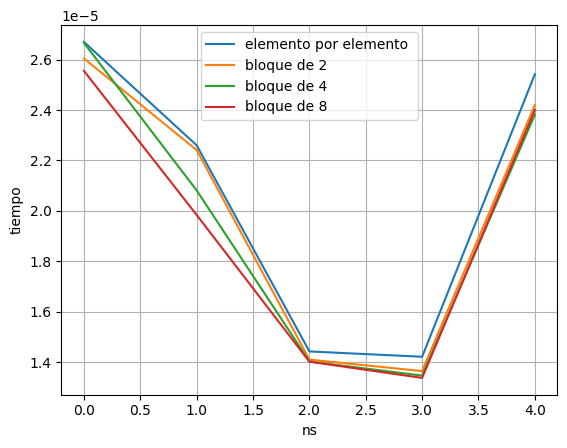

In [166]:
##Como piden los primeros valores de ns, graficaremos en el eje x 5 
## 5 valores que representaran el n correspondiente, n[0]:32...
plt.plot([0,1,2,3,4],lista_funcion1_N[:5],label='elemento por elemento ')
plt.plot([0,1,2,3,4],lista_funcion2_N[:5],label='bloque de 2')
plt.plot([0,1,2,3,4],lista_funcion3_N[:5],label='bloque de 4')
plt.plot([0,1,2,3,4],lista_funcion4_N[:5],label='bloque de 8')
plt.xlabel("ns")
plt.ylabel("tiempo")
plt.grid()
plt.legend()

i) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

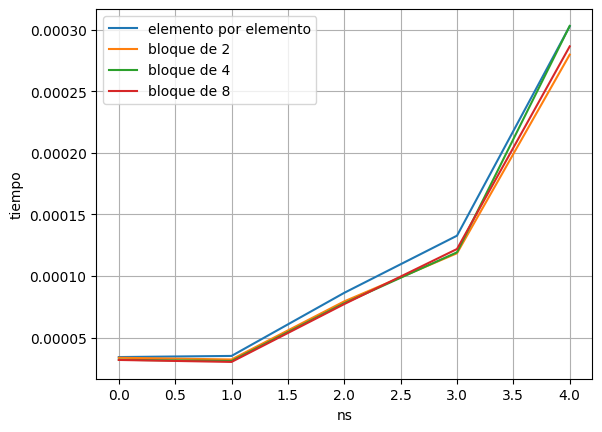

In [165]:
plt.plot([0,1,2,3,4],lista_funcion1_N[5:],label='elemento por elemento')
plt.plot([0,1,2,3,4],lista_funcion2_N[5:],label='bloque de 2')
plt.plot([0,1,2,3,4],lista_funcion3_N[5:],label='bloque de 4')
plt.plot([0,1,2,3,4],lista_funcion4_N[5:],label='bloque de 8')
plt.xlabel("ns")
plt.ylabel("tiempo")
plt.grid()
plt.legend()

j) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

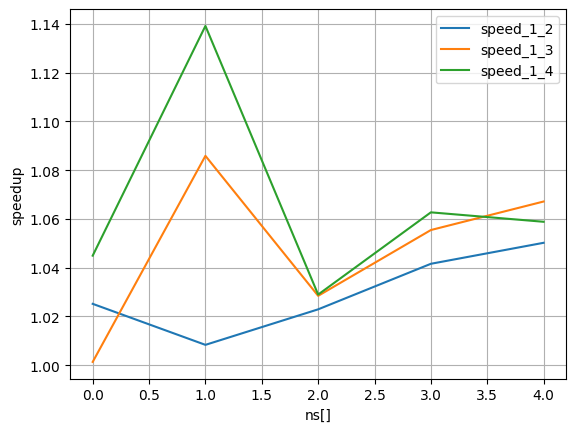

In [167]:
#Funcion más lenta: funcion que acumula elemento a elemento pues tiene mayor media de tiempo de ejecusion
speed1_2 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion2_N)]
speed1_3 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion3_N)]
speed1_4= [i / j for i, j in zip(lista_funcion1_N, lista_funcion4_N)]

plt.plot([0,1,2,3,4],speed1_2[:5],label='speed_1_2')
plt.plot([0,1,2,3,4],speed1_3[:5],label='speed_1_3')
plt.plot([0,1,2,3,4],speed1_4[:5],label='speed_1_4')

plt.xlabel("ns[]")
plt.ylabel("speedup")
plt.grid()
plt.legend()



k) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

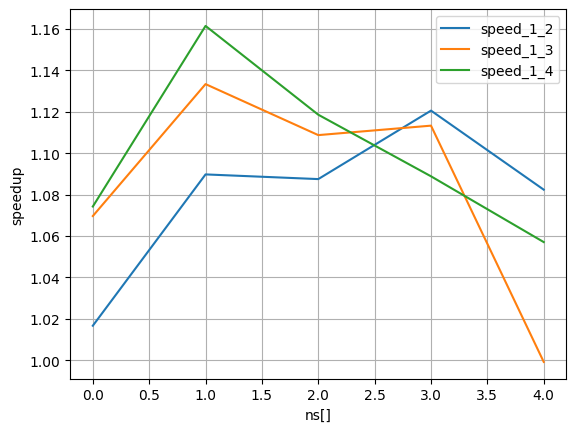

In [168]:
#Como el inciso j es el mismo, se realizara el speedup para los 5 últimos valores para ns
speed1_2 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion2_N)]
speed1_3 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion3_N)]
speed1_4= [i / j for i, j in zip(lista_funcion1_N, lista_funcion4_N)]

plt.plot([0,1,2,3,4],speed1_2[5:],label='speed_1_2')
plt.plot([0,1,2,3,4],speed1_3[5:],label='speed_1_3')
plt.plot([0,1,2,3,4],speed1_4[5:],label='speed_1_4')

plt.xlabel("ns[]")
plt.ylabel("speedup")
plt.grid()
plt.legend()

l) Extraer las características de la memoria caché de su computador (0.5)

In [169]:
! getconf -a | grep CACHE

LEVEL1_ICACHE_SIZE                 32768
LEVEL1_ICACHE_ASSOC                
LEVEL1_ICACHE_LINESIZE             64
LEVEL1_DCACHE_SIZE                 32768
LEVEL1_DCACHE_ASSOC                8
LEVEL1_DCACHE_LINESIZE             64
LEVEL2_CACHE_SIZE                  262144
LEVEL2_CACHE_ASSOC                 4
LEVEL2_CACHE_LINESIZE              64
LEVEL3_CACHE_SIZE                  8388608
LEVEL3_CACHE_ASSOC                 16
LEVEL3_CACHE_LINESIZE              64
LEVEL4_CACHE_SIZE                  0
LEVEL4_CACHE_ASSOC                 
LEVEL4_CACHE_LINESIZE              


m) Explique sus resultados de las implementaciones empleando conceptos de memoria caché. (3.5 ptos)

In [ ]:
#Los resultados se podrían explicar mediante los conceptos de localidad temporal y espacial, por ejemplo, 
#nos damos cuenta que el primer nivel de la caché tiene un tamaño de 32768 bytes y el tamaño de los bloques 
#es de 64 bytes por lo tanto tendría 512 bloques, lo que nos podría interesar aquí es que  el tamaño de los
#bloques es de 64 bytes y las variables de alta precision tipo double ocupan 8 bytes, por lo tanto cada bloque
#tendría 8 elementos, estos 8 elementos nos ayudan a explicar la localidad espacial debido a cada función y
#saber cual es la más eficiente.
#La funcion más eficiente es la funcion4(acumulacion por bloques de 8) esto se debe a que goza de una fuerte
# localidad espacial ya que aparte de llamar al primer elemento de cada elemento tambien se llama a sus vecinos
# los cuales se encuentran en la caché, además de que realizan un menor número de accesos a la memoria caché
#ya que coge los arreglos en bloques de 8, tamaño de un bloque. Las otras funciones demoran más porque
#se tiende a acceder más a la memoria caché con lo cual aumenta los tiempos de ejecusion y sus respectivas
#medianas 